# Coding Exercises (Part 2)

## Full Data Workflow A-Z: Data Preparation and Feature Creation

### Exercise 15: Data Preparation and Feature Creation

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment. 
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

If you need a hint, check the __Hints Section__ at the end of this Notebook. Exercises and Hints are numerated accordingly.

If you need some further help or if you want to check your code, you can also check the __solutions notebook__.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Option 1: Self_guided

132. Import and inspect the cars dataset (cars.csv)!

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [127]:
cars = pd.read_csv("cars.csv")

In [128]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


133. __Transform__ the format in the model_year column to __full year format__ (e.g. 1970 instead of 70)!

In [129]:
cars.model_year = cars.model_year.add(1900)

134. __Transform__ the __mpg__ column in way that the relationship with the horsepower feature is __linear__/closer to linear!<br> __Visualize__ before and after!<br> <br>
(Hint: Gallons per 100 miles might be a good format) 

In [130]:
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [131]:
cars.loc[:, ["mpg", "horsepower"]].describe()

,mpg,horsepower
count,398.000000,392.000000
mean,23.514573,104.469388
std,7.815984,38.491160
min,9.000000,46.000000
25%,17.500000,75.000000
50%,23.000000,93.500000
75%,29.000000,126.000000
max,46.600000,230.000000


135. Create a __new column__ with the __manufacturer__ name!

In [132]:
cars.name.str.split(pat = " ", n= 1, expand= True)[0]

0      chevrolet
1          buick
2       plymouth
3            amc
4           ford
         ...    
393         ford
394           vw
395        dodge
396         ford
397    chevrolet
Name: 0, Length: 398, dtype: object

In [133]:
cars["manufacture"] = cars.name.str.split(pat = " ", n= 1, expand= True)[0]

In [134]:
cars.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacture
0,18.0,8,307.0,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,1970,usa,buick skylark 320,buick


136. Add a __new column__ with the respective __continent__ (north america, asia, europe)!

In [135]:
mapper = {'usa': 'north_america', 'japan': 'asia', 'europe': 'europe'}

In [136]:
cars["continent"] = cars.origin.map(mapper)

In [137]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacture,continent
0,18.0,8,307.0,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu,chevrolet,north_america
1,15.0,8,350.0,165.0,3693,11.5,1970,usa,buick skylark 320,buick,north_america
2,18.0,8,318.0,150.0,3436,11.0,1970,usa,plymouth satellite,plymouth,north_america
3,16.0,8,304.0,150.0,3433,12.0,1970,usa,amc rebel sst,amc,north_america
4,17.0,8,302.0,140.0,3449,10.5,1970,usa,ford torino,ford,north_america


137. __Visualize__ and inspect whether there are any __extreme values__ / outliers in the __numerical columns__ that are worth to be __capped__ / __floored__!

In [138]:
plt.rcdefaults()

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >], dtype=object)

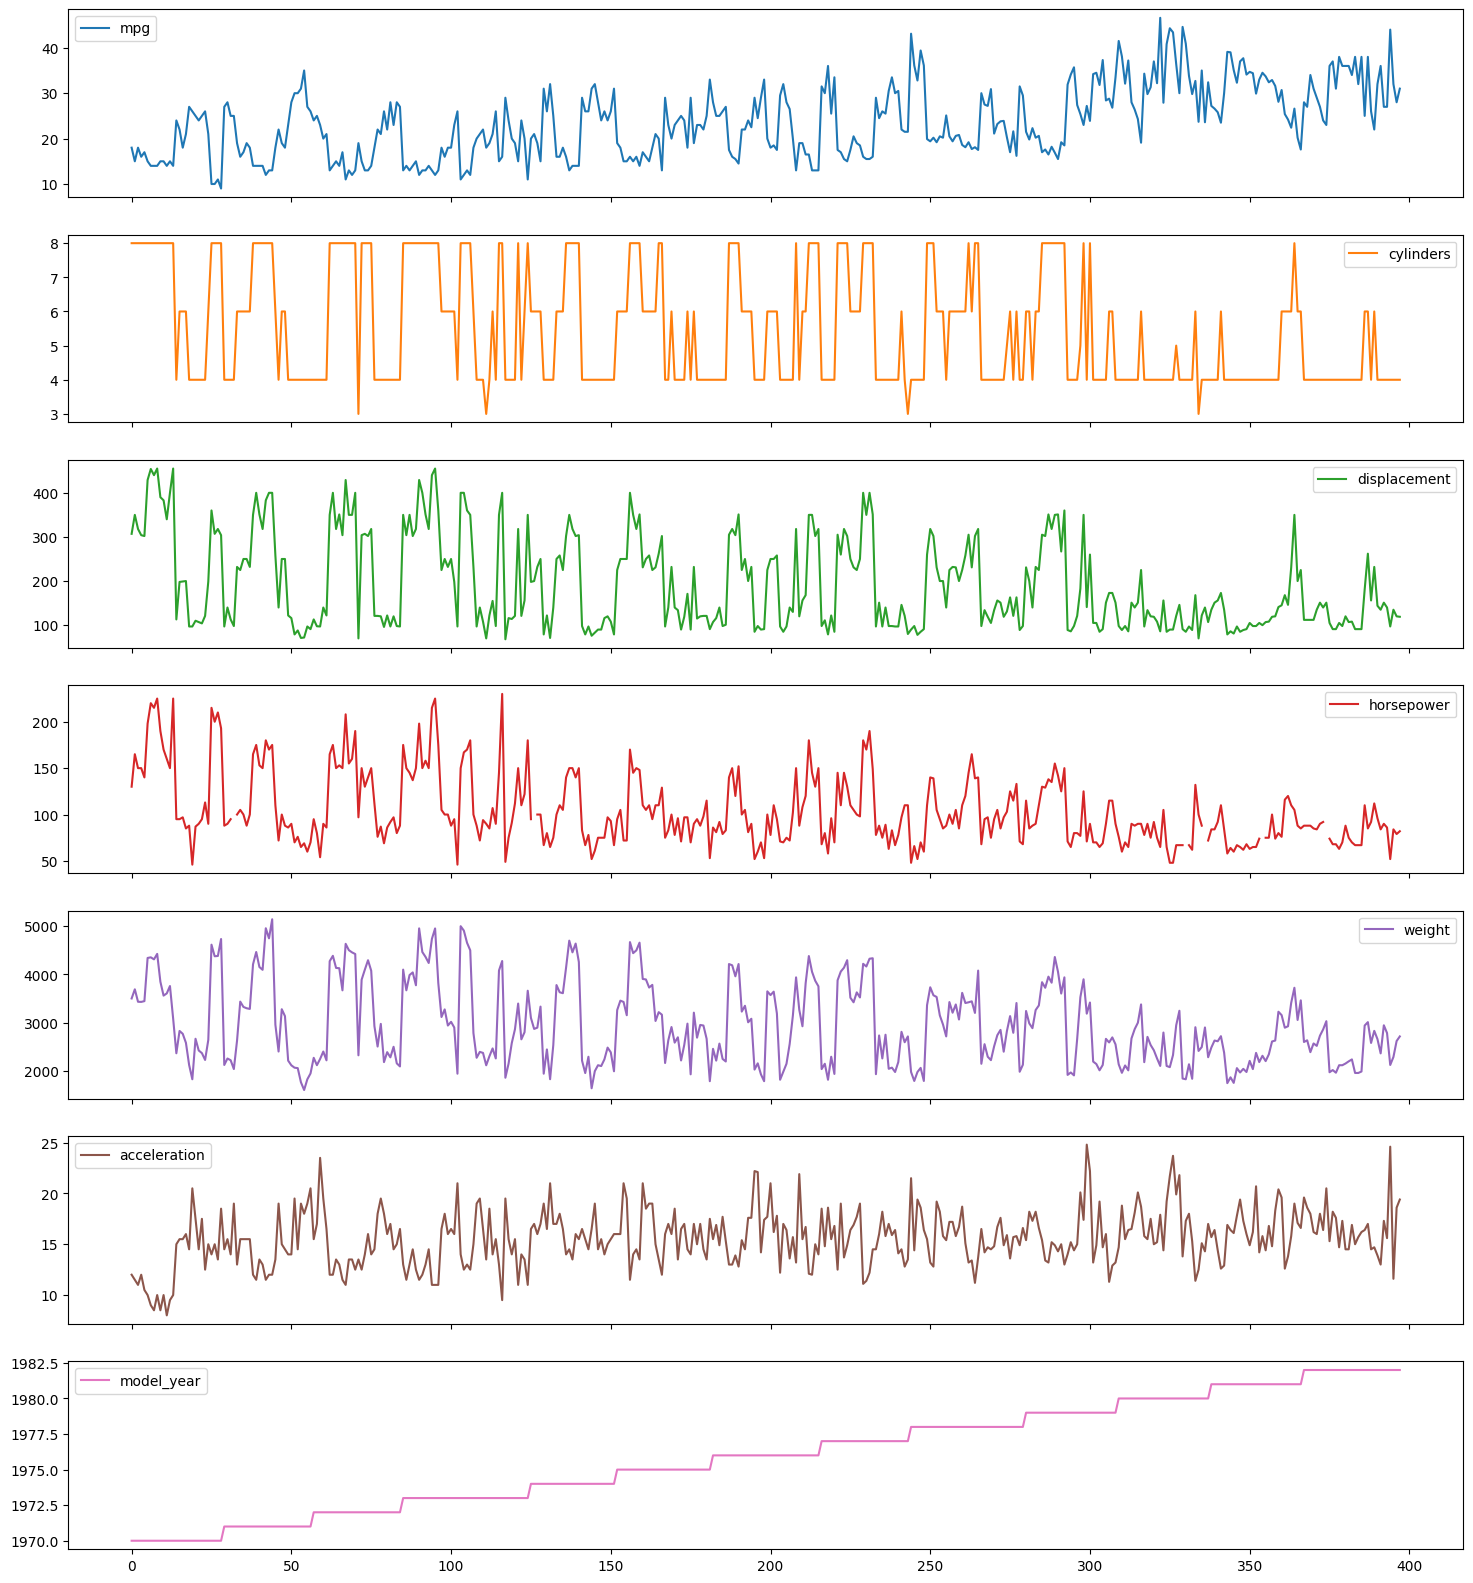

In [139]:
cars.plot(figsize= (18, 20), subplots= True)

In [140]:
cars.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,1976.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,1973.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,1976.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,1979.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000


In [141]:
pd.qcut(cars.acceleration, [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1]).value_counts()

(13.825, 15.5]    114
(15.5, 17.175]     84
(17.175, 19.0]     62
(12.0, 13.825]     59
(7.999, 12.0]      41
(19.0, 24.8]       38
Name: acceleration, dtype: int64

In [142]:
cars.acceleration.sort_values(ascending= True)

11      8.0
9       8.5
7       8.5
6       9.0
116     9.5
       ... 
300    22.2
59     23.5
326    23.7
394    24.6
299    24.8
Name: acceleration, Length: 398, dtype: float64

138. __Bin / discretize__ the __weight__ column! The __25%__ of cars with the __lowest weight__ shall get the label __"light"__, the __25%__ of cars with the __highest weight__ shall get the label __"heavy"__ and the remaining __50%__ the label __"medium"__! Create a new column __"weight_cat"__!

In [143]:
weight_labels = ["light", "medium", "heavy"]

In [144]:
pd.qcut(cars.weight, [0, 0.25, 0.75, 1]).value_counts().sort_index()

(1612.999, 2223.75]    100
(2223.75, 3608.0]      198
(3608.0, 5140.0]       100
Name: weight, dtype: int64

In [145]:
pd.qcut(cars.weight, [0, 0.25, 0.75, 1], labels= weight_labels).value_counts().sort_index()

light     100
medium    198
heavy     100
Name: weight, dtype: int64

In [146]:
cars["weight_cut"] = pd.qcut(cars.weight, [0, 0.25, 0.75, 1], labels= weight_labels)

In [147]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,manufacture,continent,weight_cut
0,18.0,8,307.0,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu,chevrolet,north_america,medium
1,15.0,8,350.0,165.0,3693,11.5,1970,usa,buick skylark 320,buick,north_america,heavy
2,18.0,8,318.0,150.0,3436,11.0,1970,usa,plymouth satellite,plymouth,north_america,medium
3,16.0,8,304.0,150.0,3433,12.0,1970,usa,amc rebel sst,amc,north_america,medium
4,17.0,8,302.0,140.0,3449,10.5,1970,usa,ford torino,ford,north_america,medium


In [148]:
x = range(100)
x

range(0, 100)

In [149]:
pd.cut(x, 2, right= False).value_counts()

[0.0, 49.5)       50
[49.5, 99.099)    50
dtype: int64

In [150]:
pd.qcut(x, [0, 0.25, 0.75, 1]).value_counts()

(-0.001, 24.75]    25
(24.75, 74.25]     50
(74.25, 99.0]      25
dtype: int64

139. __Drop__ the columns "cylinders", "displacement", "weight", "acceleration", "name", "mpg"!

In [151]:
cars.drop(columns= ["cylinders", "displacement", "weight", "acceleration", "name"], inplace= True)

In [152]:
cars.head(2)

,mpg,horsepower,model_year,origin,manufacture,continent,weight_cut
0,18.0,130.0,1970,usa,chevrolet,north_america,medium
1,15.0,165.0,1970,usa,buick,north_america,heavy


140. Bring the columns __horsepower__ and the column that you created in __question 133__ (transformed mpg column) to the same __scale__ by calculating __z-scores__! __Visualize__ before and after!

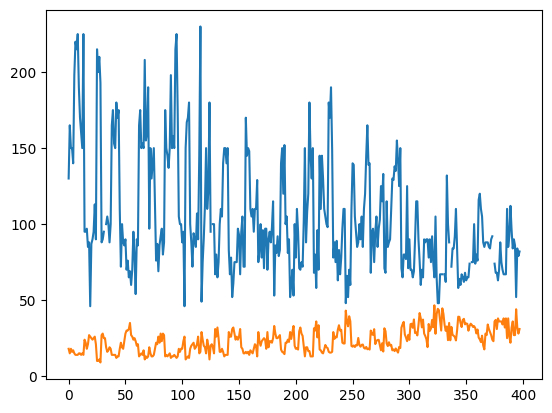

In [153]:
cars.horsepower.plot()
cars.mpg.plot()
plt.show()

In [154]:
cars.loc[:, "horsepower"].describe()

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [155]:
horsepower_mean = cars.horsepower.mean()
horsepowers_std = cars.horsepower.std()
print(horsepower_mean, horsepowers_std)

104.46938775510205 38.49115993282849


In [156]:
mpg_mean = cars.mpg.mean()
mpg_std = cars.mpg.std()
print(mpg_mean, mpg_std)

23.514572864321607 7.815984312565782


In [157]:
cars["horsepower_z"] = round((cars.horsepower - horsepower_mean) / horsepowers_std, 2)
cars["mpg_z"] = round((cars.mpg - mpg_mean) / mpg_std, 2)


In [158]:
cars.head()

,mpg,horsepower,model_year,origin,manufacture,continent,weight_cut,horsepower_z,mpg_z
0,18.0,130.0,1970,usa,chevrolet,north_america,medium,0.66,-0.71
1,15.0,165.0,1970,usa,buick,north_america,heavy,1.57,-1.09
2,18.0,150.0,1970,usa,plymouth,north_america,medium,1.18,-0.71
3,16.0,150.0,1970,usa,amc,north_america,medium,1.18,-0.96
4,17.0,140.0,1970,usa,ford,north_america,medium,0.92,-0.83


In [159]:
cars.loc[:, ["horsepower", "horsepower_z", "mpg", "mpg_z"]].describe()

,horsepower,horsepower_z,mpg,mpg_z
count,392.000000,392.000000,398.000000,398.000000
mean,104.469388,-0.001811,23.514573,-0.000528
std,38.491160,0.999803,7.815984,1.000574
min,46.000000,-1.520000,9.000000,-1.860000
25%,75.000000,-0.770000,17.500000,-0.770000
50%,93.500000,-0.285000,23.000000,-0.070000
75%,126.000000,0.557500,29.000000,0.700000
max,230.000000,3.260000,46.600000,2.950000


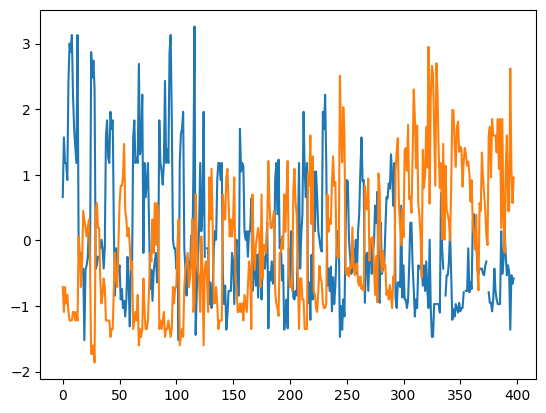

In [160]:
cars.horsepower_z.plot()
cars.mpg_z.plot()
plt.show()

141. __Transform__ the columns __model_year__ and __origin__ into (k-1) columns with __dummy variables__!

In [90]:
pd.get_dummies(data = cars, columns= ["model_year", "origin"], drop_first= True)

,horsepower,manufacture,continent,weight_cut,horsepower_z,model_year_1971,model_year_1972,model_year_1973,model_year_1974,model_year_1975,model_year_1976,model_year_1977,model_year_1978,model_year_1979,model_year_1980,model_year_1981,model_year_1982,origin_japan,origin_usa
0,130.0,chevrolet,north_america,medium,0.66,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,165.0,buick,north_america,heavy,1.57,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,150.0,plymouth,north_america,medium,1.18,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,150.0,amc,north_america,medium,1.18,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,140.0,ford,north_america,medium,0.92,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,86.0,ford,north_america,medium,-0.48,0,0,0,0,0,0,0,0,0,0,0,1,0,1
394,52.0,vw,europe,light,-1.36,0,0,0,0,0,0,0,0,0,0,0,1,0,0
395,84.0,dodge,north_america,medium,-0.53,0,0,0,0,0,0,0,0,0,0,0,1,0,1
396,79.0,ford,north_america,medium,-0.66,0,0,0,0,0,0,0,0,0,0,0,1,0,1


-----------------------------------------------------------------------------

## Option 2: Guided and Instructed

### No further guidance this time! Prepare yourself for the final challenge! (Take a look at the Hints, if necessary)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

----------------------------

## Hints (Spoiler!)

132. At this point, you should know this!

133. Use the add() method.

134. 1/mpg * 100

135. string method split()

136. Pass a mapper/dictionary to the map() method

137. Lineplot for all columns. Hint: Nothing to cap / floor

138. pd.qcut()

139. drop() method

140. z-score for all elements in horsepower column: z-score = (cars.horsepower - cars.horsepower.mean()) / cars.horsepower.std()

141. pd.get_dummies(); drop_first = True